## problem statement 
## Financial institutions often face challenges in accurately determining the eligibility of loan applicants due to varying factors such as income levels, credit history, and employment stability. Inaccurate or inconsistent loan approval decisions can result in financial losses or customer dissatisfaction.

In [59]:
 
import pandas as pd #library for dataframe interaction
import numpy as np # library for numerical computation 
df=pd.read_csv("loan_approval.csv")
df

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25,False
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163,770,12251,13,85,True
1996,Diana Lin,New Frank,38799,635,48259,17,40,False
1997,Brandon Meyer,East Haley,41957,763,16752,5,60,True
1998,Jason Price,Adamland,139022,360,24031,35,55,False


## dataset description
## Features (Input Variables)
## income
## credit score
## loan amount
## employment years
## OUTPUT Target Variables 
## loan approval

In [60]:
df.info() # basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2000 non-null   object
 1   city            2000 non-null   object
 2   income          2000 non-null   int64 
 3   credit_score    2000 non-null   int64 
 4   loan_amount     2000 non-null   int64 
 5   years_employed  2000 non-null   int64 
 6   points          2000 non-null   int64 
 7   loan_approved   2000 non-null   bool  
dtypes: bool(1), int64(5), object(2)
memory usage: 111.5+ KB


In [61]:
df.isnull().sum()#line for displaying the column with its corresponding number of rows with null values 

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [62]:
print(df.describe())# basic description about dataset 

              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
25%     61296.250000    433.000000  12748.750000       10.000000    45.000000
50%     90387.500000    576.000000  25661.500000       21.000000    55.000000
75%    120099.750000    715.000000  37380.500000       31.000000    70.000000
max    149964.000000    850.000000  49999.000000       40.000000   100.000000


In [63]:
Df=df.dropna()#line for removing the rows with some null value
len(Df)

2000

In [64]:
x=Df[["income","credit_score","loan_amount","years_employed"]]
y=Df["loan_approved"]

In [65]:
from sklearn.model_selection import train_test_split #library for splitting into traindata and test data 

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.ensemble  import RandomForestClassifier#library for creating model 

In [68]:
model=RandomForestClassifier(n_estimators=600,random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600, random_state=0)

In [69]:
y_pred=model.predict(x_test)

In [70]:
input_data=[[113810,389,39689,27]]
pred=model.predict(input_data)
pred

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([False])

In [71]:
from sklearn.metrics import accuracy_score,classification_report # library for testing accuracy of your model


In [72]:
accuracy_score=accuracy_score(y_test,y_pred)
print("accuracy",accuracy_score)

accuracy 0.9875


In [73]:
classification_report=classification_report(y_test,y_pred)
print(classification_report)


              precision    recall  f1-score   support

       False       0.99      0.99      0.99       220
        True       0.99      0.98      0.99       180

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



Correlation Matrix:
                  income  credit_score  loan_amount  years_employed    points  \
income          1.000000     -0.027113     0.037612       -0.014441  0.451142   
credit_score   -0.027113      1.000000    -0.008076        0.023598  0.740899   
loan_amount     0.037612     -0.008076     1.000000        0.013015 -0.223039   
years_employed -0.014441      0.023598     0.013015        1.000000  0.156441   
points          0.451142      0.740899    -0.223039        0.156441  1.000000   
loan_approved   0.238066      0.715788    -0.157859        0.104408  0.821415   

                loan_approved  
income               0.238066  
credit_score         0.715788  
loan_amount         -0.157859  
years_employed       0.104408  
points               0.821415  
loan_approved        1.000000  


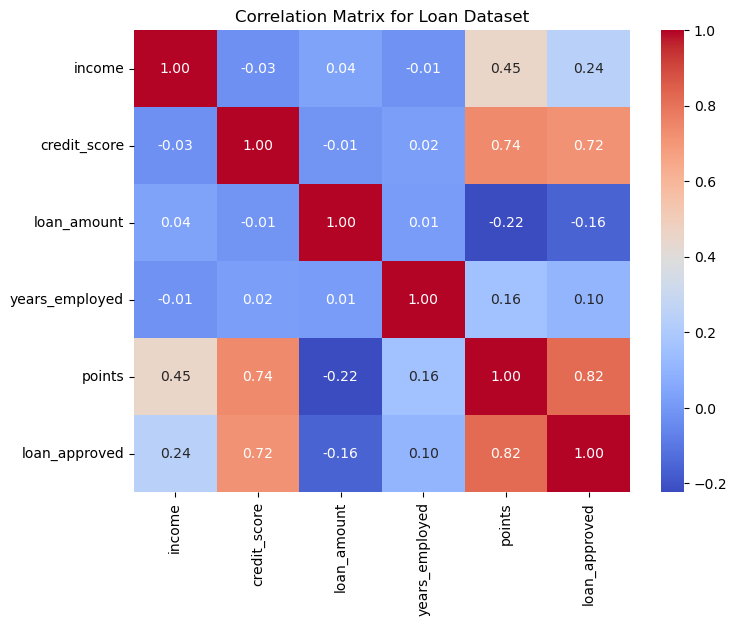

In [74]:

import seaborn as sns
import matplotlib.pyplot as plt

# --- Compute correlation matrix ---
corr_matrix = Df.corr(numeric_only=True)  # ensures only numeric columns are used

# --- Display in console ---
print("Correlation Matrix:")
print(corr_matrix)

# --- Plot heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Loan Dataset")
plt.show()


Confusion Matrix:
[[218   2]
 [  3 177]]


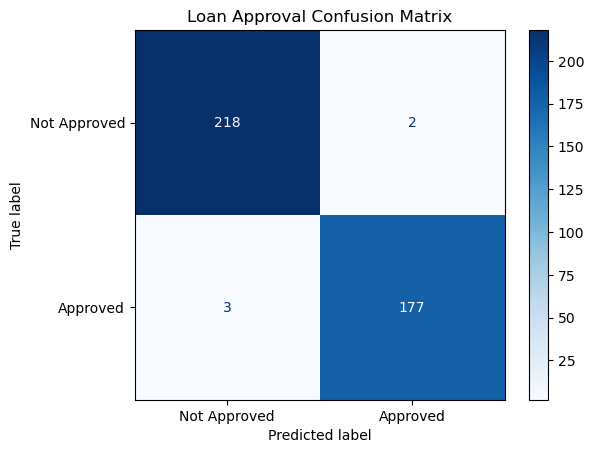

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Assume you already have these ---
# y_test : actual values
# y_pred : predicted values from your model

# --- Create confusion matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- Print matrix values ---
print("Confusion Matrix:")
print(cm)

# --- Visualize confusion matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])
disp.plot(cmap='Blues')
plt.title("Loan Approval Confusion Matrix")
plt.show()


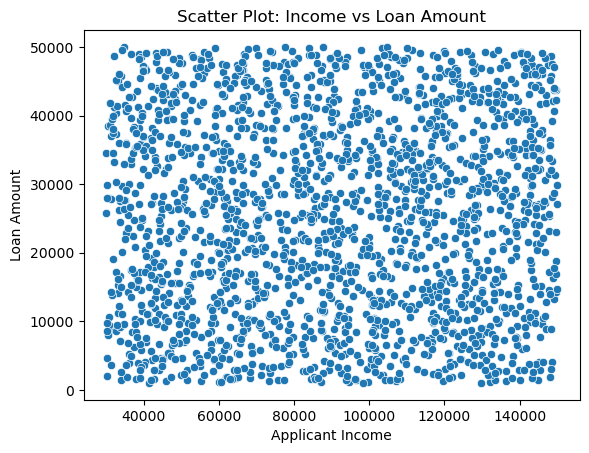

In [76]:


# --- Basic scatter plot ---
sns.scatterplot(data=Df, x='income', y='loan_amount')

plt.title("Scatter Plot: Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()


In [77]:
import pickle  # library for saving model
saving =model 
with open('saving.pkl','wb') as file:
    pickle.dump(saving,file)